# Implementing a Linear Regression problem with Python

Now, we are ready to implement our own linear regression example. 

In linear regression, our hypothesis function $h_\theta$ is:

$$h_\theta(x) = \theta_0 + \theta_1x$$

And, as we are doing regression, our cost function is: 

$$J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2 $$

Nota that, the cost funtion is just the sum of all the square errors from our hypothesis ($\hat{y}_i$) versus the data ($y_i$).

The best parameters for our hypothesis will give us the **minimum cost function**.

## Finding a minimum for J

Finding a minimum of a function is equivalent to finding the parameters that make the gradient of that function to vanish. In other words:

$$\nabla_{\theta} J(\theta) = 0$$

We will implement two ways of solving this problem.

### A) Gradient descent (Numerical method)


From a starting point ($\theta$), we will try to move to a new point $\theta '$, decreasing the cost funtion ($J(\theta)$). We will do this many times, up to we find a minimum (or close enough to it).

#### Partial differentials of the cost function (using chain rule)

$$\frac{\partial J}{\partial\theta_0} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i)$$

$$\frac{\partial J}{\partial\theta_1} = \frac{2}{m}\sum_{i=1}^m(h_\theta(x_i)-y_i) \cdot x_i$$

Finally, we need to update iteratively the values for $\theta_0$ and $\theta_1$. Using Gradient Descent algorithm  with learning rate ($\alpha$) until convergence criterion ($\epsilon$) is achieved:

         while (convergence==False):
$$\theta_0' = \theta_0 - \alpha \frac{\partial J}{\partial\theta_0} $$
$$\theta_1' = \theta_1 - \alpha \frac{\partial J}{\partial\theta_1} $$
$$J' = J(\theta_0',\theta_1')$$
$$\Delta J = abs(J'-J)$$
$$ convergence = (\Delta J < \epsilon)$$

### B) Normal equations (Algebra)

In matrix notation, we can implement our hypothesis as:

$$h_\theta (x^{(i)})=(x^{(i)})^T \theta$$

Note that, in this case, if we want to consider our hypothesis such $h(\theta) = \theta_0 + \theta_i x^{(i)}$ where $x$ is a vector, for consistency, we need to introduce an additional "constant feature" in our data. In other words, we need to map our input data as follows:

$$x_i \rightarrow [1,x_i]$$

we can express gradient of J as follows:

$$\nabla_{\theta} J(\theta) = X^T X \theta - X^T \vec{y}$$

To minimize J, we set its derivatives to zero, therefore obtaining the **normal equations**:

$$ X^T X \theta = X^T \vec{y}$$

We can solve this equation for theta.

As a final remark, we can extend this method to non linear hypothesis by extending our input data $x$ to the features we need. For example, for a parabolic fit:

$$x_i \rightarrow [1,x_i,x_i^2]$$

## Problem

Giving the data provided below (x->y), find the best equation fit, using:

* Gradient Descent
* Normal Equations

Using your own python implementation, using numpy and scipy tools (**not scipy!**).

0 1
d0 ->
-420.21574128832253
d1 ->
-44093.551570890566
93306.39601483254 74901.27290173208
--------
0.004202157412883226 1.4409355157089057
d0 ->
-376.00509616781426
d1 ->
-39381.01346098486
74901.27290173208 60220.04132840576
--------
0.007962208374561368 1.8347456503187543
d0 ->
-336.51948963015326
d1 ->
-35172.13141169747
60220.04132840576 48509.24974561723
--------
0.011327403270862901 2.186466964435729
d0 ->
-301.2539296174068
d1 ->
-31413.076802135263
48509.24974561723 39167.891762906766
--------
0.014339942567036969 2.5005977324570816
d0 ->
-269.7573954782549
d1 ->
-28055.77398581329
39167.891762906766 31716.562059866646
--------
0.017037516521819517 2.7811554723152145
d0 ->
-241.6270697332505
d1 ->
-25057.285437181046
31716.562059866646 25772.852953511225
--------
0.019453787219152023 3.031728326687025
d0 ->
-216.5031863245131
d1 ->
-22379.262611076996
25772.852953511225 21031.728955535833
--------
0.021618819082397156 3.255520952797795
d0 ->
-194.06442946261774
d1 ->
-19987.4

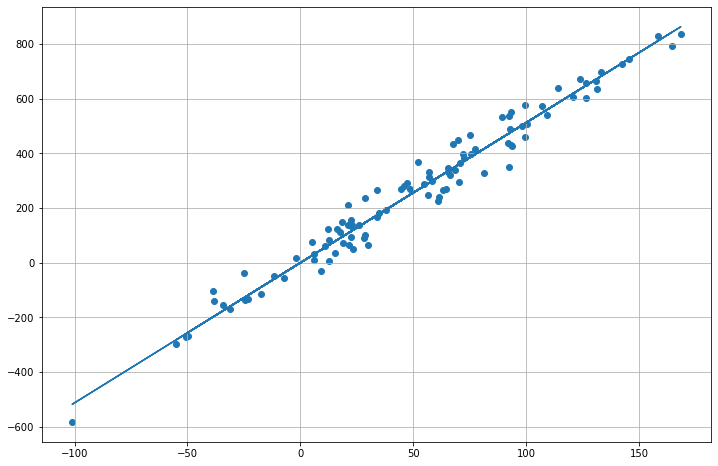

In [36]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


theta_0 = 2
theta_1 = 5

X = (np.random.randn(100) + 1) * 50
jitter = 50 * np.random.randn(100)
y = theta_0 + theta_1 * X + jitter
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(X, y)
ax.grid(True)

def hipotesis (theta0,theta1,X):
    return theta0 + theta1 * X

def Jota(theta0,theta1,X):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (1/m) * np.sum((prediccion - y)**2)

def derivada0 (X,theta0,theta1):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (2/m) * np.sum(prediccion - y)

def derivada1 (X,theta0,theta1):
    m=len(X)
    prediccion = hipotesis(theta0,theta1,X)
    return (2/m) * np.sum((prediccion - y)*X)

    
theta0 = 0
theta1 = 1
epsilon = 0.01 
alpha = 0.00001
for i in range(100):
    print (theta0,theta1)
    coste = Jota(theta0,theta1,X)
    d0 = derivada0(X,theta0,theta1)
    print ("d0 ->")
    print (d0)
    d1 = derivada1(X,theta0,theta1)
    print ("d1 ->")
    print (d1)
    theta0_next = theta0 - (alpha * d0)
    theta1_next = theta1 - (alpha * d1)
    coste1 = Jota(theta0_next,theta1_next,X)
    theta0=theta0_next
    theta1=theta1_next
    print (coste,coste1)
    print ("--------")

ax.plot(X, hipotesis (theta0,theta1,X))
ax.grid(True)    